In [13]:
import numpy as np

mean_list = np.load('box_shape.npy')
min_j=100
max_j=0
mean_j=0
for i,j in mean_list:
    min_j = min(min_j, j)
    max_j = max(max_j, j)
    mean_j += j
print(min_j)
print(max_j)
print(mean_j/len(mean_list))

6
6
6.0


In [8]:
import pandas as pd
mean_df = pd.DataFrame(mean_list)
mean_df.columns = ['box_width', 'box_height']
mean_df

,box_width,box_height
0,2,6
1,1,6
2,1,6
3,2,6
4,2,6
...,...,...
26396,1,6
26397,2,6
26398,2,6
26399,2,6


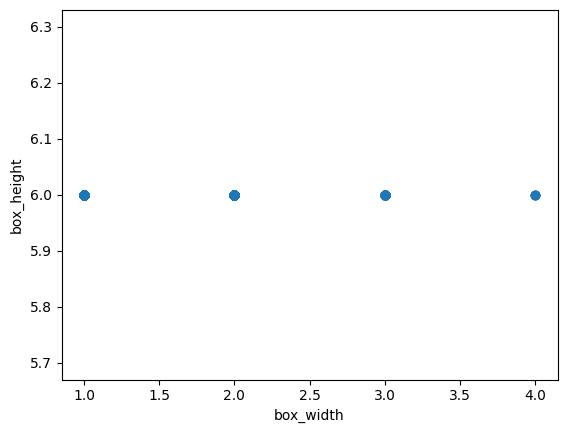

In [12]:
from seaborn import jointplot, regplot
from matplotlib import pyplot as plt
regplot(x='box_width', y='box_height', data=mean_df, fit_reg=False)
plt.show()

### YOLO

  0%|          | 0/26401 [00:00<?, ?it/s]


0: 640x640 1 face, 7.0ms
Speed: 1.7ms preprocess, 7.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


/tmp/ipykernel_1243947/354322687.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  w, h = torch.tensor(results[0].boxes.xywh).cpu().squeeze(0)[2:]
  0%|          | 0/26401 [00:00<?, ?it/s]

tensor([[107.3195, 110.3261, 164.7764, 210.1289]], device='cuda:0')
tensor(164.7764) tensor(210.1289)


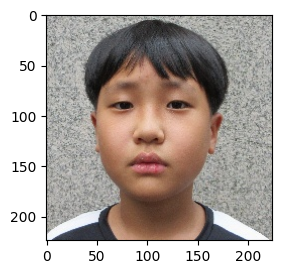

In [31]:
from ultralytics import YOLO
from PIL import Image
import os
from os import path as osp
import torch
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt


model = 'weight/face_detector/weights/best.pt'
model = YOLO(model)
src_path = 'data/asian_face'

flag = 0

for img_path in tqdm(os.listdir(src_path)):
    img_path = osp.join(src_path, img_path)
    img = Image.open(img_path)
    plt.subplot(1,2,1)
    plt.imshow(img)
    results = model.predict(source=[img], device='cuda:0', iou=0.001)
    print(results[0].boxes.xywh)
    w, h = torch.tensor(results[0].boxes.xywh).cpu().squeeze(0)[2:]
    print(w,h)
    break

